In [1]:
import warnings
import joblib
from compare import *
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor,VotingRegressor, IsolationForest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
sns.set_style('whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#load your data into the dataframe
my_data = read_csv('COM726.csv')

In [3]:
# Drop column with Nan value
my_data = my_data.drop(['Unnamed: 16'], axis=1)
my_data.head()# Drop columns


,Region_Country,Second_Tier_Authority,Local_Authority,Code,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Grand_Total,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
0,North East,Darlington,Darlington,E06000005,2005.0,188.7,104.9,47.5,262.5,214.0,-0.9,816.7,100.3,8.1,197.5,4.1
1,North East,Darlington,Darlington,E06000005,2006.0,175.9,108.2,46.7,260.3,210.1,-1.4,799.8,101.5,7.9,197.5,4.1
2,North East,Darlington,Darlington,E06000005,2007.0,170.7,102.8,44.7,251.2,208.4,-2.0,775.7,102.6,7.6,197.5,3.9
3,North East,Darlington,Darlington,E06000005,2008.0,177.3,101.8,44.3,252.2,193.1,-2.3,766.4,103.7,7.4,197.5,3.9
4,North East,Darlington,Darlington,E06000005,2009.0,149.2,89.3,38.7,228.8,190.2,-2.3,693.9,104.4,6.6,197.5,3.5


In [4]:
# Drop rows which have all NaN in its row
my_data = my_data.dropna(how='all')

In [5]:
my_data = my_data.drop(['Region_Country', 'Second_Tier_Authority', 'Local_Authority', 'Code', 'Grand_Total'], axis=1)
my_data.head()

,Year,Industry_Total,Commercial_Total,Public_Sector_Total,Domestic_Total,Transport_Total,LULUCF_Net_Emissions,Population,Per_Capita_Emissions(t),Area(km2),Emissions_per_km2(kt)
0,2005.0,188.7,104.9,47.5,262.5,214.0,-0.9,100.3,8.1,197.5,4.1
1,2006.0,175.9,108.2,46.7,260.3,210.1,-1.4,101.5,7.9,197.5,4.1
2,2007.0,170.7,102.8,44.7,251.2,208.4,-2.0,102.6,7.6,197.5,3.9
3,2008.0,177.3,101.8,44.3,252.2,193.1,-2.3,103.7,7.4,197.5,3.9
4,2009.0,149.2,89.3,38.7,228.8,190.2,-2.3,104.4,6.6,197.5,3.5


In [6]:
my_data['Year'] = my_data['Year'].apply(np.int64)

print(my_data.dtypes)

Year                         int64
Industry_Total             float64
Commercial_Total           float64
Public_Sector_Total        float64
Domestic_Total             float64
Transport_Total            float64
LULUCF_Net_Emissions       float64
Population                 float64
Per_Capita_Emissions(t)    float64
Area(km2)                  float64
Emissions_per_km2(kt)      float64
dtype: object


In [7]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(my_data)

capping the  Year
capping the  Industry_Total
capping the  Commercial_Total
capping the  Public_Sector_Total
capping the  Domestic_Total
capping the  Transport_Total
capping the  LULUCF_Net_Emissions
capping the  Population
capping the  Per_Capita_Emissions(t)
capping the  Area(km2)
capping the  Emissions_per_km2(kt)


Year                          AxesSubplot(0.125,0.125;0.0596154x0.755)
Industry_Total             AxesSubplot(0.196538,0.125;0.0596154x0.755)
Commercial_Total           AxesSubplot(0.268077,0.125;0.0596154x0.755)
Public_Sector_Total        AxesSubplot(0.339615,0.125;0.0596154x0.755)
Domestic_Total             AxesSubplot(0.411154,0.125;0.0596154x0.755)
Transport_Total            AxesSubplot(0.482692,0.125;0.0596154x0.755)
LULUCF_Net_Emissions       AxesSubplot(0.554231,0.125;0.0596154x0.755)
Population                 AxesSubplot(0.625769,0.125;0.0596154x0.755)
Per_Capita_Emissions(t)    AxesSubplot(0.697308,0.125;0.0596154x0.755)
Area(km2)                  AxesSubplot(0.768846,0.125;0.0596154x0.755)
Emissions_per_km2(kt)      AxesSubplot(0.840385,0.125;0.0596154x0.755)
dtype: object

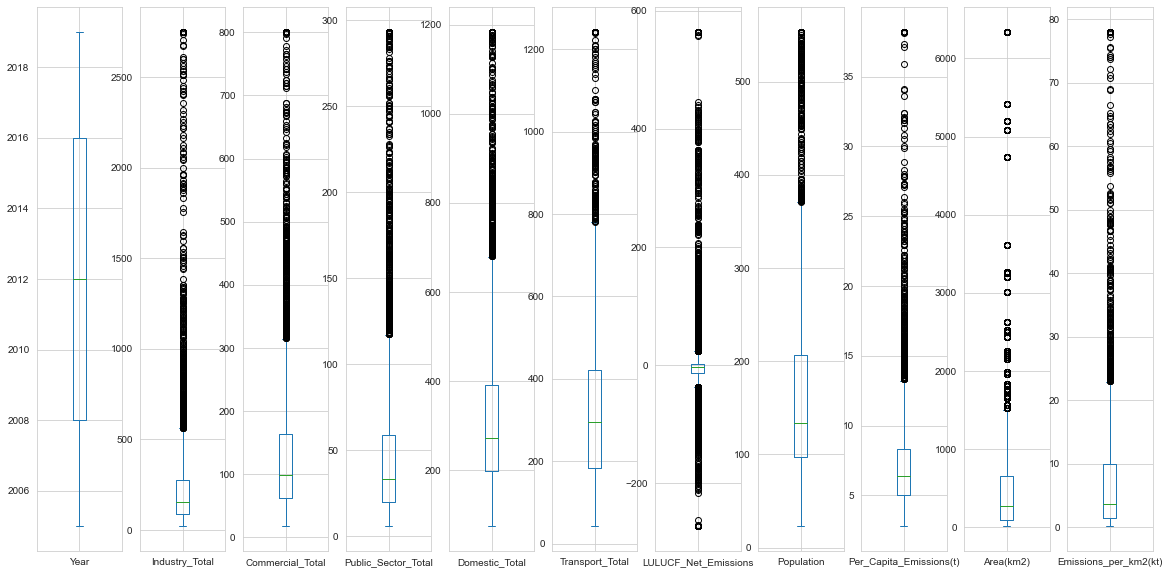

In [8]:
my_data.plot(kind='box',  subplots=True, sharey=False, figsize=(20, 10))

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Industry_Total'}>,
        <AxesSubplot:title={'center':'Commercial_Total'}>],
       [<AxesSubplot:title={'center':'Public_Sector_Total'}>,
        <AxesSubplot:title={'center':'Domestic_Total'}>,
        <AxesSubplot:title={'center':'Transport_Total'}>],
       [<AxesSubplot:title={'center':'LULUCF_Net_Emissions'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Per_Capita_Emissions(t)'}>],
       [<AxesSubplot:title={'center':'Area(km2)'}>,
        <AxesSubplot:title={'center':'Emissions_per_km2(kt)'}>,
        <AxesSubplot:>]], dtype=object)

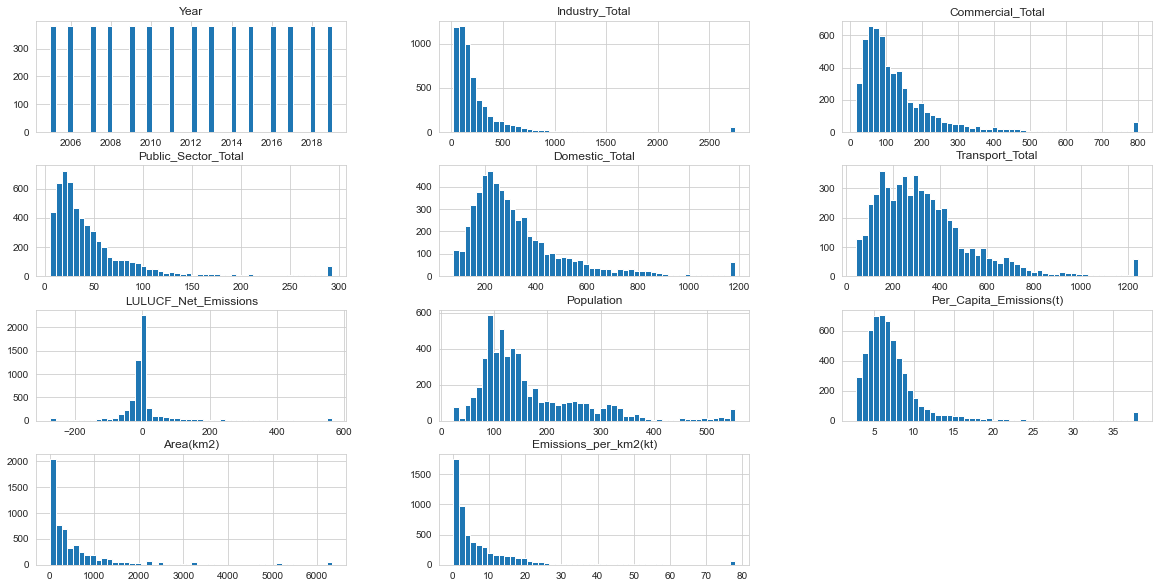

In [9]:
my_data.hist(figsize=(20,10),bins=50)

In [10]:
X = my_data.drop('Per_Capita_Emissions(t)', axis=1)  #  X= my_data.iloc[:,:-1]
y = my_data['Per_Capita_Emissions(t)']  # y= my_data.iloc[:,-1]

In [11]:
#split the data into train and test - split using 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#check the number of train and test data
print('\n The total of training dataset', X_train.shape)
print('\n The total of test dataset', X_test.shape)


 The total of training dataset (3979, 10)

 The total of test dataset (1706, 10)


In [12]:
rf_model = RandomForestRegressor(max_depth=None, max_features= 'auto', n_estimators=200, random_state=0)
#fit the model to the training set
model1 = rf_model.fit(X_train, y_train)
#predict the model
y_pred = model1.predict(X_test)
#predict model on train data
y_pred_train = model1.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.3f}'.format(r2))
print('R2 Score Train data:{:.3f}'.format(r2_train))

Mean absolute error: 0.25
Mean squared error: 0.24
Root mean squared error: 0.49
Mean absolute percentage error:, 0.03
r2 score:0.990
R2 Score Train data:0.999


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'RFR residual plot')]

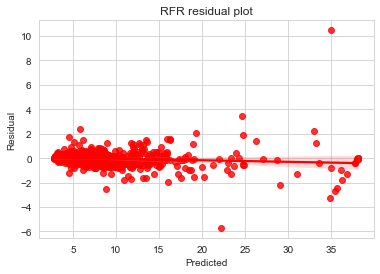

In [13]:
residual = y_pred - y_test
ax = sns.regplot(x = y_pred, y = residual, data = None, scatter = True, color = 'red')
ax.set( xlabel = "Predicted", ylabel = "Residual", title='RFR residual plot')

[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'RFR Actual vs Predicted')]

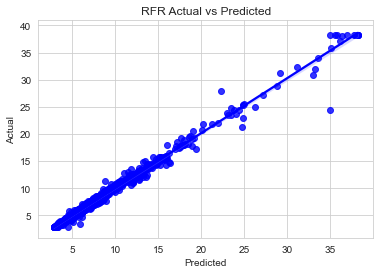

In [14]:
ax = sns.regplot(x = y_pred, y = y_test, data = None, scatter = True, color = 'blue')
ax.set( xlabel = "Predicted", ylabel = "Actual", title='RFR Actual vs Predicted')

In [15]:
#initialise the model
gb_model = GradientBoostingRegressor(max_depth= 3, max_features= 'sqrt', n_estimators= 400,random_state=0)
#fit gb model to the training set
model2 = gb_model.fit(X_train, y_train.ravel())  #use ravel to avoid warning about 2d array
#predict the model
y_pred = model2.predict(X_test)
#predict model on train data
y_pred_train = model2.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.3f}'.format(r2))
print('R2 Score Train data:{:.3f}'.format(r2_train))

Mean absolute error: 0.25
Mean squared error: 0.21
Root mean squared error: 0.46
Mean absolute percentage error:, 0.03
r2 score:0.991
R2 Score Train data:0.998


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'GBR residual plot')]

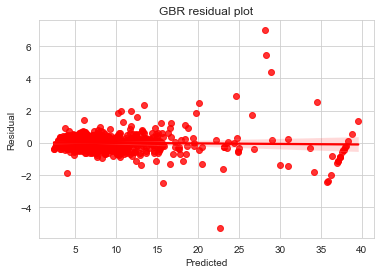

In [16]:
residual = y_pred - y_test
ax = sns.regplot(x = y_pred, y = residual, data = None, scatter = True, color = 'red')
ax.set( xlabel = "Predicted", ylabel = "Residual", title='GBR residual plot')

[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'GBR Actual vs Predicted')]

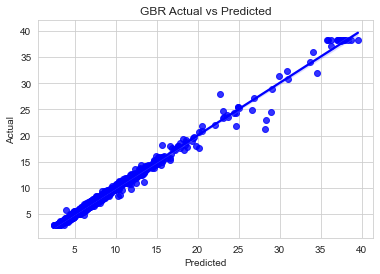

In [17]:
ax = sns.regplot(x = y_pred, y = y_test, data = None, scatter = True, color = 'blue')
ax.set( xlabel = "Predicted", ylabel = "Actual", title='GBR Actual vs Predicted')

In [18]:
#initialise the model
knn = KNeighborsRegressor(leaf_size= 15, n_neighbors= 5, p= 1)
#fit the to the training set
model5 = knn.fit(X_train, y_train.ravel())  #use ravel to avoid warning about 2d array
#predict the model
y_pred = model5.predict(X_test)
#predict model on train data
y_pred_train = model5.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.3f}'.format(r2))
print('R2 Score Train data:{:.3f}'.format(r2_train))

Mean absolute error: 0.44
Mean squared error: 0.45
Root mean squared error: 0.67
Mean absolute percentage error:, 0.06
r2 score:0.981
R2 Score Train data:0.990


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'KNNR residual plot')]

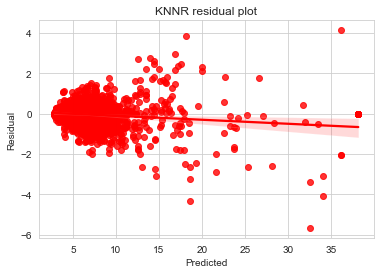

In [19]:
residual = y_pred - y_test
ax = sns.regplot(x = y_pred, y = residual, data = None, scatter = True, color = 'red')
ax.set( xlabel = "Predicted", ylabel = "Residual", title='KNNR residual plot')

[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'KNNR Actual vs Predicted')]

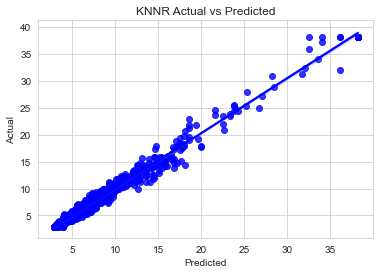

In [20]:
ax = sns.regplot(x = y_pred, y = y_test, data = None, scatter = True, color = 'blue')
ax.set( xlabel = "Predicted", ylabel = "Actual", title='KNNR Actual vs Predicted')

In [21]:
#initialise the model
svr_model = LinearSVR(C= 1, epsilon= 0.3, random_state=0)
#fit gb model to the training set
model6 = svr_model.fit(X_train, y_train)
#predict the model
y_pred = model6.predict(X_test)
#predict model on train data
y_pred_train = model6.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.3f}'.format(r2))
print('R2 Score Train data:{:.3f}'.format(r2_train))

Mean absolute error: 1.43
Mean squared error: 7.33
Root mean squared error: 2.71
Mean absolute percentage error:, 0.18
r2 score:0.693
R2 Score Train data:0.704


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'SVR residual plot')]

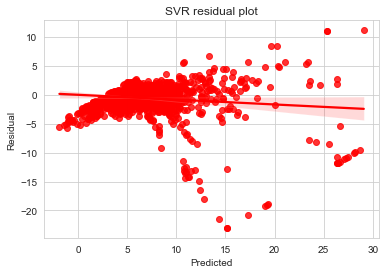

In [22]:
residual = y_pred - y_test
ax = sns.regplot(x = y_pred, y = residual, data = None, scatter = True, color = 'red')
ax.set( xlabel = "Predicted", ylabel = "Residual", title='SVR residual plot')

[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'SVR Actual vs Predicted')]

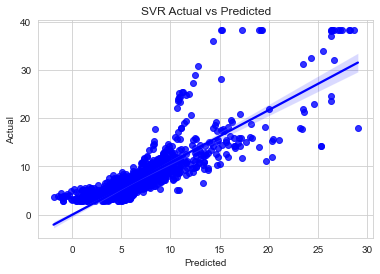

In [23]:
ax = sns.regplot(x = y_pred, y = y_test, data = None, scatter = True, color = 'blue')
ax.set( xlabel = "Predicted", ylabel = "Actual", title='SVR Actual vs Predicted')

In [24]:
estimators = [('rf', RandomForestRegressor(max_depth=None, max_features= 'auto', n_estimators=200, random_state=0)),
              ('svr', LinearSVR(C= 1, epsilon= 0.3, random_state=0)),
              ('knr', KNeighborsRegressor(leaf_size= 15, n_neighbors= 5, p= 1))]

final_estimator = GradientBoostingRegressor(max_depth= 3, max_features= 'sqrt', n_estimators= 400, random_state=0)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)
stackmod = reg.fit(X_train, y_train)
#predict the model
y_pred = stackmod.predict(X_test)
#predict model on train data
y_pred_train = stackmod.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.3f}'.format(r2))
print('R2 Score Train data:{:.3f}'.format(r2_train))

Mean absolute error: 0.29
Mean squared error: 0.27
Root mean squared error: 0.52
Mean absolute percentage error:, 0.04
r2 score:0.989
R2 Score Train data:0.995


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'SR(SVR) residual plot')]

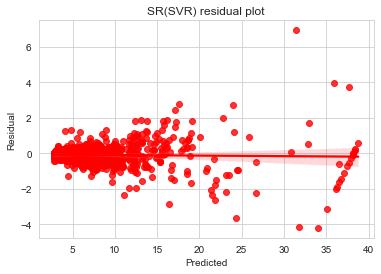

In [25]:
residual = y_pred - y_test
ax = sns.regplot(x = y_pred, y = residual, data = None, scatter = True, color = 'red')
ax.set( xlabel = "Predicted", ylabel = "Residual", title='SR(SVR) residual plot')

[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'SR(SVR) Actual vs Predicted')]

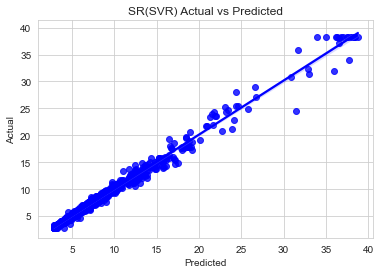

In [26]:
ax = sns.regplot(x = y_pred, y = y_test, data = None, scatter = True, color = 'blue')
ax.set( xlabel = "Predicted", ylabel = "Actual", title='SR(SVR) Actual vs Predicted')

In [27]:
estimators = [('rf', RandomForestRegressor(max_depth=None, max_features= 'auto', n_estimators=200, random_state=0)),

              ('knr', KNeighborsRegressor(leaf_size= 15, n_neighbors= 5, p= 1))]

final_estimator = GradientBoostingRegressor(max_depth= 3, max_features= 'sqrt', n_estimators= 400, random_state=0)
reg2 = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)
stackmod2 = reg2.fit(X_train, y_train)
#predict the model
y_pred = stackmod2.predict(X_test)
#predict model on train data
y_pred_train = stackmod2.predict(X_train)
#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#the r2 for the train dataset
r2_train = r2_score(y_train, y_pred_train)

#printing the model evaluation values
print('Mean absolute error: {:.2f}'.format(mae))
print('Mean squared error: {:.2f}'.format(mse))
print('Root mean squared error: {:.2f}'.format(rmse))
print('Mean absolute percentage error:, {:.2f}'.format(mape))
print('r2 score:{:.3f}'.format(r2))
print('R2 Score Train data:{:.3f}'.format(r2_train))

Mean absolute error: 0.25
Mean squared error: 0.19
Root mean squared error: 0.44
Mean absolute percentage error:, 0.03
r2 score:0.992
R2 Score Train data:0.997


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'SR residual plot')]

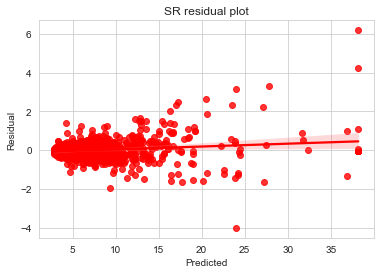

In [28]:
residual = y_pred - y_test
ax = sns.regplot(x = y_pred, y = residual, data = None, scatter = True, color = 'red')
ax.set( xlabel = "Predicted", ylabel = "Residual", title='SR residual plot')

[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'SR Actual vs Predicted')]

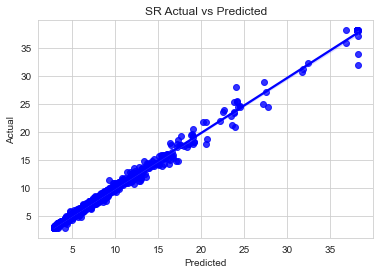

In [29]:
ax = sns.regplot(x = y_pred, y = y_test, data = None, scatter = True, color = 'blue')
ax.set( xlabel = "Predicted", ylabel = "Actual", title='SR Actual vs Predicted')

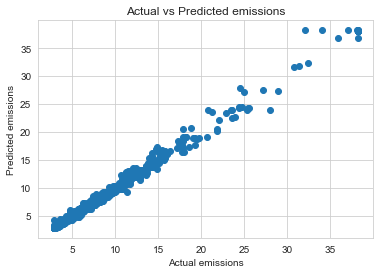

In [30]:
plt.scatter(y_test, y_pred)
#plt.plot(range(20000), range(20000))

plt.xlabel("Actual emissions")
plt.ylabel("Predicted emissions")
plt.title("Actual vs Predicted emissions")

plt.show()

In [31]:
#saving model to disk
final_model = 'reg2.sav'
joblib.dump(reg2, final_model)

['reg2.sav']